In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
# !kaggle competitions download -c spaceship-titanic

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
dataset.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
dataset["Cabin"].nunique()

6560

In [8]:
dataset["Destination"].nunique()

3

In [9]:
dataset["HomePlanet"].nunique()

3

# Basic Processing

To keep the problem simple, we're going to get rid of the NaNs. Then we would encode the "Destination" and "Home Planet" fields with one-hot vectors. It is convenient since they don't take a lot of different values. The "Cabin" and the "Name" columns won't be kept.

In [10]:
dataset.dropna(inplace = True)

In [11]:
dataset.drop(['Name', 'Cabin'], axis = 1, inplace = True)

In [12]:
from sklearn.preprocessing import OneHotEncoder

## Train Set Encoding 

In [13]:
encoder = OneHotEncoder(sparse = False)
one_hots = encoder.fit_transform(dataset[["Destination"]])

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
encoder.categories_

[array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)]

In [15]:
destinations = ['To : '+name for name in ['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']]
destinations

['To : 55 Cancri e', 'To : PSO J318.5-22', 'To : TRAPPIST-1e']

In [16]:
cols = pd.DataFrame(one_hots, columns = destinations, index=dataset.index)
cols.shape

(6606, 3)

In [17]:
prepared_dataset = dataset.join(cols).drop(['Destination'], axis = 1)
prepared_dataset.tail()

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,To : 55 Cancri e,To : PSO J318.5-22,To : TRAPPIST-1e
8688,9276_01,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1.0,0.0,0.0
8689,9278_01,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0
8690,9279_01,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0.0,0.0,1.0
8691,9280_01,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1.0,0.0,0.0
8692,9280_02,Europa,False,44.0,False,126.0,4688.0,0.0,0.0,12.0,True,0.0,0.0,1.0


In [18]:
encoder = OneHotEncoder(sparse = False)
one_hots = encoder.fit_transform(dataset[["HomePlanet"]])

/home/jean/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
encoder.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object)]

In [20]:
planets = ['from : '+name for name in ['Earth', 'Europa', 'Mars']]

In [21]:
cols = pd.DataFrame(one_hots, columns = planets, index=dataset.index)
prepared_dataset = prepared_dataset.join(cols).drop(['HomePlanet'], axis = 1)
prepared_dataset.tail()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,To : 55 Cancri e,To : PSO J318.5-22,To : TRAPPIST-1e,from : Earth,from : Europa,from : Mars
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1.0,0.0,0.0,0.0,1.0,0.0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,1.0,0.0,0.0
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0.0,0.0,1.0,1.0,0.0,0.0
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1.0,0.0,0.0,0.0,1.0,0.0
8692,9280_02,False,44.0,False,126.0,4688.0,0.0,0.0,12.0,True,0.0,0.0,1.0,0.0,1.0,0.0


# Data split

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(prepared_dataset, test_size=0.2)

In [23]:
X_train = train_set.drop(["Transported"], axis = 1)
Y_train = train_set["Transported"]
X_test = test_set.drop(["Transported"], axis = 1)
Y_test = test_set["Transported"]

In [24]:
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,To : 55 Cancri e,To : PSO J318.5-22,To : TRAPPIST-1e,from : Earth,from : Europa,from : Mars
7463,7984_04,False,1.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6477,6832_01,True,33.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8313,8872_01,True,23.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6561,6921_05,True,19.0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5132,5483_01,False,17.0,False,2.0,0.0,0.0,0.0,681.0,0.0,1.0,0.0,1.0,0.0,0.0


# Model Training

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 300)
forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300)

# Prediction

In [65]:
Y_pred = forest_classifier.predict(X_test)

# Accuracy

In [66]:
Y_pred.shape

(1322,)

In [67]:
Y_test.shape

(1322,)

In [68]:
n = Y_test.shape[0]

In [69]:
accuracy = (Y_pred == Y_test).sum() / n
accuracy

0.7927382753403933

Our accuracy is 79%. That's fairly good for a model coded that quickly !

# Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred,Y_test)

array([[535, 149],
       [125, 513]])

# Precision

In [71]:
from sklearn.metrics import precision_score

In [72]:
precision_score(Y_pred,Y_test)

0.7749244712990937

# Recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall_score(Y_pred,Y_test)

0.8040752351097179

This time, our recall is a bit better than our precision. But it seems that we could do better in both areas. 

# ROC Curve

In [75]:
from sklearn.metrics import roc_curve

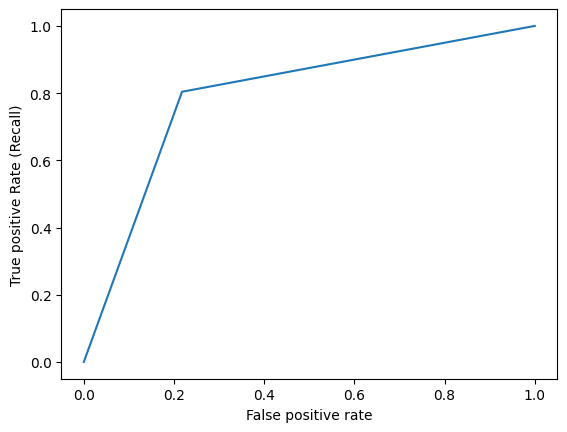

In [76]:
fpr, tpr, thresholds = roc_curve(Y_pred,Y_test)
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive Rate (Recall)")
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(Y_pred,Y_test)

0.7931194888998883